In [1]:
import os
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
import re
import gc
# mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)

from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

fullmodel = T5ForConditionalGeneration.from_pretrained("../models/prottrans_t5_xl_u50/").to(device)

#fullmodel.full() if str(device)=='cpu' else fullmodel.half()

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('../models/prottrans_t5_xl_u50', do_lower_case=False, legacy=False)

if device == "cuda:0":
    torch.cuda.empty_cache()
else:
    print("No CUDA")

No CUDA


In [2]:
### Load sequences and annotations for disprot

def get_sequences(fastadir=None, fastafile=None):
    sequences = []
    if fastadir is None and fastafile is None:
        print("No fasta dir or file")
        raise
    if fastadir is not None and fastafile is not None:
        print("Choose one, fasta dir or multi fasta filr")
        raise
    # check for a directory with individual fasta files
    # or a multi fasta file
    if fastadir is not None:
        fastafiles = os.listdir(fastadir)
        for f in fastafiles:
            counter = 0
            for record in SeqIO.parse(os.path.join(fastadir, f), "fasta"):
                sequences.append(record)
                counter += 1
                if counter > 1:
                    print("More than one fasta record?", f)
                    raise
    elif fastafile is not None:
        for record in SeqIO.parse(fastafile, "fasta"):
            sequences.append(record)
    return sequences

# Disprot
# embeddir="/data/franco/disorder_flavours/testset/" #"/data/franco/datasets/prot_embedding_weights/disprot/halft5/"
fasta_file = "../testset_sequences.fasta"
counter = 0

# find annotation for each sequence
annotfile = "../testset_annotations.fasta"
annots    = get_sequences(fastadir=None, fastafile=annotfile)
sequences = get_sequences(fastadir=None, fastafile=fasta_file)

In [3]:

def sequence_masker(seq, i, j, same_extra_token=False):
    masked_sequence_list = seq.split()
    token_num = 0
    if j<=i:
        print(f"index j={j} must be greater than i={i}")
        raise
    for x in range(i, j):
        if j > len(seq):
            break
        masked_sequence_list[x] = f"<extra_id_{token_num}>"
        if not same_extra_token:
            token_num += 1
    return " ".join(masked_sequence_list)


seqnum = 0
input_seq = [" ".join(list(re.sub(r"[UZOB]", "X", str(sequences[seqnum].seq))))]
seqlen = len(str(sequences[seqnum].seq))
print(f"Input protein: {input_seq}")

ids = tokenizer.batch_encode_plus(input_seq, add_special_tokens=True, padding="longest")
print(ids)

masked_seq = [sequence_masker(input_seq[0], 5, 6)]
print(masked_seq)
m_ids = tokenizer.batch_encode_plus(masked_seq, add_special_tokens=True, padding="longest")
print(m_ids)

Input protein: ['M E E P Q S D P S V E P P L S Q E T F S D L W K L L P E N N V L S P L P S Q A M D D L M L S P D D I E Q W F T E D P G P D E A P R M P E A A P P V A P A P A A P T P A A P A P A P S W P L S S S V P S Q K T Y Q G S Y G F R L G F L H S G T A K S V T C T Y S P A L N K M F C Q L A K T C P V Q L W V D S T P P P G T R V R A M A I Y K Q S Q H M T E V V R R C P H H E R C S D S D G L A P P Q H L I R V E G N L R V E Y L D D R N T F R H S V V V P Y E P P E V G S D C T T I H Y N Y M C N S S C M G G M N R R P I L T I I T L E D S S G N L L G R N S F E V R V C A C P G R D R R T E E E N L R K K G E P H H E L P P G S T K R A L P N N T S S S P Q P K K K P L D G E Y F T L Q I R G R E R F E M F R E L N E A L E L K D A Q A G K E P G G S R A H S S H L K S K K G Q S T S R H K K L M F K T E G P D S D']
{'input_ids': [[19, 9, 9, 13, 16, 7, 10, 13, 7, 6, 9, 13, 13, 4, 7, 16, 9, 11, 15, 7, 10, 4, 21, 14, 4, 4, 13, 9, 17, 17, 6, 4, 7, 13, 4, 13, 7, 16, 3, 19, 10, 10, 4, 19, 4, 7, 13, 10, 10, 12, 9,

In [4]:
tokenizer.get_vocab()

{'<pad>': 0,
 '</s>': 1,
 '<unk>': 2,
 '▁A': 3,
 '▁L': 4,
 '▁G': 5,
 '▁V': 6,
 '▁S': 7,
 '▁R': 8,
 '▁E': 9,
 '▁D': 10,
 '▁T': 11,
 '▁I': 12,
 '▁P': 13,
 '▁K': 14,
 '▁F': 15,
 '▁Q': 16,
 '▁N': 17,
 '▁Y': 18,
 '▁M': 19,
 '▁H': 20,
 '▁W': 21,
 '▁C': 22,
 '▁X': 23,
 '▁B': 24,
 '▁O': 25,
 '▁U': 26,
 '▁Z': 27,
 '<extra_id_99>': 28,
 '<extra_id_98>': 29,
 '<extra_id_97>': 30,
 '<extra_id_96>': 31,
 '<extra_id_95>': 32,
 '<extra_id_94>': 33,
 '<extra_id_93>': 34,
 '<extra_id_92>': 35,
 '<extra_id_91>': 36,
 '<extra_id_90>': 37,
 '<extra_id_89>': 38,
 '<extra_id_88>': 39,
 '<extra_id_87>': 40,
 '<extra_id_86>': 41,
 '<extra_id_85>': 42,
 '<extra_id_84>': 43,
 '<extra_id_83>': 44,
 '<extra_id_82>': 45,
 '<extra_id_81>': 46,
 '<extra_id_80>': 47,
 '<extra_id_79>': 48,
 '<extra_id_78>': 49,
 '<extra_id_77>': 50,
 '<extra_id_76>': 51,
 '<extra_id_75>': 52,
 '<extra_id_74>': 53,
 '<extra_id_73>': 54,
 '<extra_id_72>': 55,
 '<extra_id_71>': 56,
 '<extra_id_70>': 57,
 '<extra_id_69>': 58,
 '<extra_id_

In [5]:
input_ids = torch.tensor(ids['input_ids']).to(device)
masked_ids = torch.tensor(m_ids['input_ids']).to(device)

with torch.no_grad():
    emb = fullmodel(input_ids=input_ids, labels=input_ids)
    loss = emb.loss
    emb_mask = fullmodel(input_ids=masked_ids, labels=input_ids)
    loss_mask = emb_mask.loss
print(f"True seq loss: {loss.item()}")
print(f"Masked seq loss: {loss_mask.item()}")

True seq loss: 1.9363943337680212e-08
Masked seq loss: 0.014227996580302715


In [6]:
cpulogits = emb.logits.cpu()
fastpred = tokenizer.decode(torch.tensor(cpulogits[:,:-1,:].numpy().argmax(-1)[0]), skip_special_tokens=False).replace("<"," <").replace(">","> ")
print(fastpred)
fastpred = tokenizer.decode(torch.argmax(cpulogits.squeeze()[:-1], dim=1), skip_special_tokens=False).replace("<"," <").replace(">","> ")
print(fastpred)

M E E P Q S D P S V E P P L S Q E T F S D L W K L L P E N N V L S P L P S Q A M D D L M L S P D D I E Q W F T E D P G P D E A P R M P E A A P P V A P A P A A P T P A A P A P A P S W P L S S S V P S Q K T Y Q G S Y G F R L G F L H S G T A K S V T C T Y S P A L N K M F C Q L A K T C P V Q L W V D S T P P P G T R V R A M A I Y K Q S Q H M T E V V R R C P H H E R C S D S D G L A P P Q H L I R V E G N L R V E Y L D D R N T F R H S V V V P Y E P P E V G S D C T T I H Y N Y M C N S S C M G G M N R R P I L T I I T L E D S S G N L L G R N S F E V R V C A C P G R D R R T E E E N L R K K G E P H H E L P P G S T K R A L P N N T S S S P Q P K K K P L D G E Y F T L Q I R G R E R F E M F R E L N E A L E L K D A Q A G K E P G G S R A H S S H L K S K K G Q S T S R H K K L M F K T E G P D S D
M E E P Q S D P S V E P P L S Q E T F S D L W K L L P E N N V L S P L P S Q A M D D L M L S P D D I E Q W F T E D P G P D E A P R M P E A A P P V A P A P A A P T P A A P A P A P S W P L S S S V P S Q K T Y Q G S Y 

In [12]:
cpulogits = emb.logits[:-1].cpu()
torch.save(cpulogits, f"test_logits.pt")

In [20]:
## Remember to squeeze the logits before subsetting!!
emb.logits.squeeze()[:-1].shape

torch.Size([393, 128])

In [13]:
torch.load("test_logits.pt")

tensor([], size=(0, 394, 128))

In [8]:
from torch.nn import CrossEntropyLoss

celoss = CrossEntropyLoss()
print("loss:           ",celoss(emb.logits.squeeze(), input_ids.squeeze()))

# get whole-protein loss from single aminoacid losses
acum = 0
for i in range(seqlen-1):
    acum += celoss(emb.logits.squeeze()[i], input_ids.squeeze()[i])
print("acumulated loss:", acum/(seqlen-1))

# single aminoacid loss on masked sequence
celoss(emb_mask.logits.squeeze()[5], input_ids.squeeze()[5])

# get whole-protein loss from single aminoacid losses in masked sequence
acum = 0
for i in range(seqlen-1):
    acum += celoss(emb_mask.logits.squeeze()[i], input_ids.squeeze()[i])
print("acumulated mask loss:", acum/(seqlen-1))

loss:            tensor(1.9364e-08)
acumulated loss: tensor(1.9463e-08)
acumulated mask loss: tensor(0.0143)


In [9]:
## calculate loss but using generate function

with torch.no_grad():
    gen = fullmodel.generate(input_ids, max_length=seqlen+1, return_dict_in_generate=True, output_scores=True)
    gen_mask = fullmodel.generate(masked_ids, max_length=seqlen+1, return_dict_in_generate=True, output_scores=True)


In [10]:
gen_scores.shape

NameError: name 'gen_scores' is not defined

In [ ]:
print(tokenizer.decode(gen.sequences[0]))
print(tokenizer.decode(gen_mask.sequences[0]))
print(input_seq)
gen_scores = torch.stack([s.squeeze() for s in gen.scores], dim=0)
gen_mask_scores = torch.stack([s.squeeze() for s in gen_mask.scores], dim=0)
fastpred = tokenizer.decode(torch.tensor(gen_scores.numpy().argmax(-1)), skip_special_tokens=False).replace("<"," <").replace(">","> ")
print(fastpred)
fastpred = tokenizer.decode(torch.tensor(gen_mask_scores.numpy().argmax(-1)), skip_special_tokens=False).replace("<"," <").replace(">","> ")
print(fastpred)
fastpred = tokenizer.decode(torch.argmax(gen_mask_scores, dim=1), skip_special_tokens=False).replace("<"," <").replace(">","> ")
print(fastpred)


print(gen_scores.shape)
print(gen_mask_scores.shape)
print(tokenizer.decode(torch.argmax(gen_mask_scores, dim=1)))
print(seqlen)
print(masked_ids.shape)
print(input_ids.shape)
print(tokenizer.decode(input_ids[0]))

<pad>M E E P Q S D P S V E P P L S Q E T F S D L W K L L P E N N V L S P L P S Q A M D D L M L S P D D I E Q W F T E D P G P D E A P R M P E A A P P V A P A P A A P T P A A P A P A P S W P L S S S V P S Q K T Y Q G S Y G F R L G F L H S G T A K S V T C T Y S P A L N K M F C Q L A K T C P V Q L W V D S T P P P G T R V R A M A I Y K Q S Q H M T E V V R R C P H H E R C S D S D G L A P P Q H L I R V E G N L R V E Y L D D R N T F R H S V V V P Y E P P E V G S D C T T I H Y N Y M C N S S C M G G M N R R P I L T I I T L E D S S G N L L G R N S F E V R V C A C P G R D R R T E E E N L R K K G E P H H E L P P G S T K R A L P N N T S S S P Q P K K K P L D G E Y F T L Q I R G R E R F E M F R E L N E A L E L K D A Q A G K E P G G S R A H S S H L K S K K G Q S T S R H K K L M F K T E G P D S D
<pad>M E E P Q P G P S V E P P L S Q E T F S D L W K L L P E N N V L S P L P S Q A M D D L M L S P D D I E Q W F T E D P G P D E A P R M P E A A P P V A P A P A A P T P A A P A P A P S W P L S S S V P S Q K T 

In [ ]:
# in input_ids we chop the end of sequence token
print(celoss(gen_scores, input_ids.squeeze()[:-1,]))
print(celoss(gen_mask_scores, input_ids.squeeze()[:-1,]))

acum = 0
for i in range(seqlen-1):
    acum += celoss(torch.stack([s.squeeze() for s in gen.scores], dim=0)[i], input_ids.squeeze()[i])
print("acumulated loss:", acum/(seqlen-1))

acum = 0
for i in range(seqlen-1):
    acum += celoss(torch.stack([s.squeeze() for s in gen_mask.scores], dim=0)[i], input_ids.squeeze()[i])
print("acumulated mask loss:", acum/(seqlen-1))

tensor(1.9413e-08)
tensor(0.0139)
acumulated loss: tensor(1.9463e-08)
acumulated mask loss: tensor(0.0139)


In [88]:
from tqdm import tqdm

celoss = CrossEntropyLoss()
target_seq = str(sequences[seqnum].seq)
input_seq = [" ".join(list(re.sub(r"[UZOB]", "X", target_seq)))]
true_input = tokenizer(input_seq)
true_tok = torch.tensor(true_input['input_ids']).to(device)
attention_mask = torch.tensor(true_input['attention_mask']).to(device)

pred_dict = dict()
uniprot_id = sequences[seqnum].id
pred_dict[uniprot_id] = dict()
loss_sequence = list()
match_sequence = list()
logits_sequence = list()
mask_size = 1
autoregressive=False
output_attentions=False
#for i in tqdm(range(len(target_seq)-mask_size+1)):
for i in tqdm(range(2-mask_size+1)):
    masked_seq = [sequence_masker(input_seq[0], i, i+mask_size)]
    tmp = tokenizer(masked_seq)
    input_ids = torch.tensor(tmp['input_ids']).to(device)

    if autoregressive:
        with torch.no_grad():
            emb = fullmodel.generate(input_ids, max_length=len(input_ids[0])+1, return_dict_in_generate=True, output_scores=True, output_attentions=output_attentions)
        cpulogits = torch.stack([s.squeeze() for s in emb.scores], dim=0)[:-1,]
        fastpred = tokenizer.decode(torch.argmax(cpulogits, dim=1), skip_special_tokens=False).replace("<"," <").replace(">","> ")
        
        # Calculate protein-level loss from single aminoacid losses
        acum = 0
        for j in range(cpulogits.shape[0]):
            acum += celoss(cpulogits[j], true_tok.squeeze()[:-1][j])        
        protein_loss  = acum/cpulogits.shape[0]
        # the proper full protein loss should be the one below, but it will fail if dimentions are not correct
        # the above expression will be wrong, but aproximate? maybe shifted by one? it will suck, let's set it to -1
        ## protein_loss2 = celoss(cpulogits, true_tok.squeeze()[:-1])
    else:
        with torch.no_grad():
            emb = fullmodel(input_ids=input_ids, labels=true_tok, output_attentions=output_attentions)
        protein_loss = emb.loss.cpu()
        
        cpulogits = emb.logits.cpu().squeeze()[:-1]
        ## fastpred = tokenizer.decode(torch.tensor(cpulogits[:,:-1,:].numpy().argmax(-1)[0]), skip_special_tokens=False).replace("<"," <").replace(">","> ")
        fastpred = tokenizer.decode(torch.argmax(cpulogits, dim=1), skip_special_tokens=False).replace("<"," <").replace(">","> ")

    logits_sequence.append(cpulogits.numpy().tolist())
    if input_seq[0] == fastpred:
        match_sequence.append(True)
        loss_sequence.append(protein_loss.item())
    else:
        pred_arr = fastpred.split()
        seq_arr  = input_seq[0].split()
        if len(pred_arr) == len(seq_arr):
            local_match_sequence = list()
            for j in range(len(pred_arr)):
                if pred_arr[j] != seq_arr[j]:
                    local_match_sequence.append((j,pred_arr[j], seq_arr[j]))
            loss_sequence.append(protein_loss.item())
            match_sequence.append(local_match_sequence)
        else:
            print(f"{i} - Mismatch length error")
            match_sequence.append(False)
            loss_sequence.append(-1)
        
        
pred_dict[uniprot_id][f"aamask_{mask_size}"] = dict()
pred_dict[uniprot_id][f"aamask_{mask_size}"]["match"] = match_sequence
pred_dict[uniprot_id][f"aamask_{mask_size}"]["loss"] = loss_sequence
pred_dict[uniprot_id][f"aamask_{mask_size}"]["logits"] = logits_sequence

100%|██████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.95s/it]


In [89]:
import json

for e in pred_dict[uniprot_id][f"aamask_{mask_size}"]["logits"]:
    print(np.array(e).shape)

with open(f"test.json", 'w') as outfmt:
    json.dump(pred_dict[uniprot_id][f"aamask_{mask_size}"]["logits"], outfmt)

(393, 128)
(393, 128)


my loss: 0.037141963839530945   avg acum loss:  0.037141941487789154
model loss:  0.037047695368528366
my loss: 0.009701764211058617   avg acum loss:  0.009701755829155445
model loss:  0.009677140042185783
my loss: 0.009637031704187393   avg acum loss:  0.009637023322284222
model loss:  0.009612571448087692
my loss: 0.012975537218153477   avg acum loss:  0.012975528836250305
model loss:  0.012942604720592499
my loss: 0.015078084543347359   avg acum loss:  0.015078072436153889
model loss:  0.015039815567433834
my loss: 0.014264199882745743   avg acum loss:  0.014264189638197422
model loss:  0.014227996580302715
my loss: 0.01354617066681385   avg acum loss:  0.013546159490942955
model loss:  0.013511789962649345
my loss: 0.010445240885019302   avg acum loss:  0.010445229709148407
model loss:  0.010418729856610298
my loss: 0.01505939569324255   avg acum loss:  0.015059385448694229
model loss:  0.01502117421478033
my loss: 0.01597464829683304   avg acum loss:  0.015974638983607292
model lo

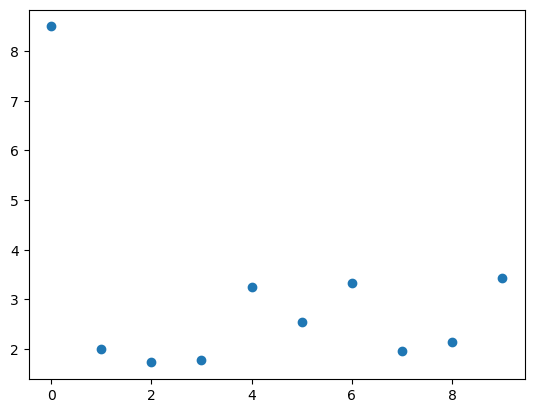

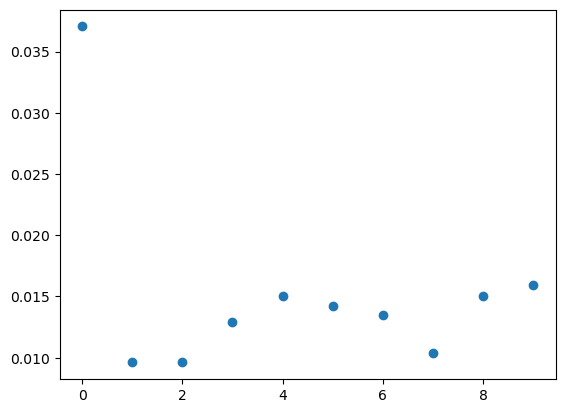

In [259]:
### Dev code to prove that protein_loss can be obtained from single_aa losses

AA_tok_ids = [i for i in tokenizer.get_vocab().values() if i not in tokenizer.all_special_ids]
masked_aaloss_sequence = list()
protloss_sequence = list()
aalevel_loss_sequence = list()

for i in range(len(logits_sequence)):
    masked_aaloss = celoss(logits_sequence[i][i], true_tok.squeeze()[i])
    masked_aaloss_sequence.append(masked_aaloss.item())
    acum = 0
    singleaa_losses = list()
    for j in range(logits_sequence[i].shape[0]):
        singleaa_losses.append(celoss(logits_sequence[i][j], true_tok.squeeze()[:-1][j]))
        acum +=                celoss(logits_sequence[i][j], true_tok.squeeze()[:-1][j])
    
    aalevel_loss_sequence.append(singleaa_losses)
    acumloss = acum/logits_sequence[i].shape[0]
    print("my loss:", celoss(logits_sequence[i], true_tok.squeeze()[:-1]).item(), "  avg acum loss: ", acumloss.item())
    print("model loss: ",loss_sequence[i])
    protloss_sequence.append(acumloss.item())

#print(aaloss_sequence)
plt.scatter(np.arange(len(masked_aaloss_sequence)), masked_aaloss_sequence)
plt.show()
plt.scatter(np.arange(len(loss_sequence)), loss_sequence)
plt.show()

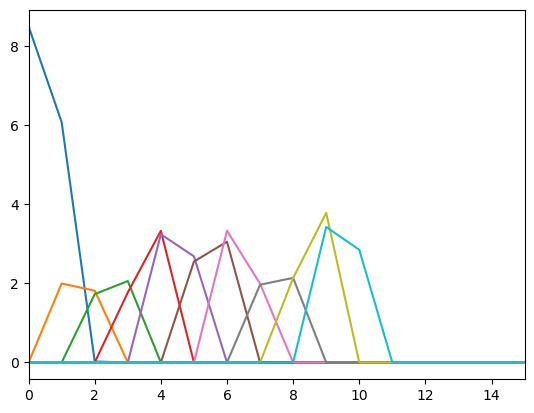

In [253]:
## Single-aa losses on each masked protein
fig = plt.figure()
for i in range(len(aalevel_loss_sequence)):
    plt.plot(np.arange(len(aalevel_loss_sequence[i])), aalevel_loss_sequence[i])
plt.xlim(0,15)
plt.show()